In [157]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

In [315]:
PIT = 1  # Process Time
Fs = 10e3  # Sampling Freq
Freq = 100  # Jammer Freq
NumSamples = PIT * Fs  # Number of samples to process
t = np.arange(0, NumSamples - 1, 1) / Fs  # time samples
f = np.arange(0, NumSamples - 1, 1) / PIT  # Frequency Samples
CWa = 1 * np.exp(2j * np.pi * Freq * t)  # Simulate a complex sin signal with frequency of 500
CWb = 1 * np.exp(2j * (np.pi * Freq * t+0.00*np.pi)) # Simulate a complex sin signal with frequency of 500

In [316]:
var = 10
sig_a = CWa + np.sqrt(var) * rnd.randn(len(CW)) + np.sqrt(var) * 1j * rnd.randn(len(CW)) 
sig_b = CWb + np.sqrt(var) * rnd.randn(len(CW)) + np.sqrt(var) * 1j * rnd.randn(len(CW)) ## Adding noise to the CW signal with Variance of var

In [317]:
# zero pad
zeros = [0 for i in range(len(CWa)+1)]
sig_a = np.append(sig_a, zeros)
sig_b = np.append(sig_b, zeros)

(0, 200)

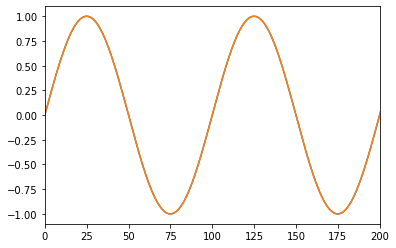

In [318]:
plt.figure()
plt.plot(CWa.imag)
plt.plot(CWb.imag)
plt.xlim([0,200])

In [319]:
fft_res = np.fft.fft(sig_a)
fft_res_rev = (np.fft.fft(np.flip(sig_b)))

In [320]:
double_fft = fft_res*fft_res_rev
inv_fft = abs(np.fft.ifft(double_fft))
shifted_res = np.fft.fftshift(inv_fft)

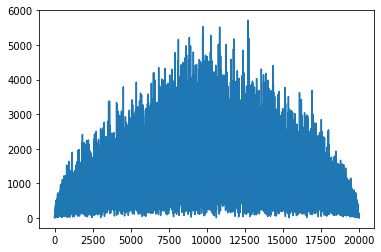

In [321]:
plt.figure()
plt.plot(np.fft.fftshift(inv_fft))
# plt.xticks(np.arange(-int(len(inv_fft)/2), int(len(inv_fft)/2+1)))
plt.show()

In [322]:
x_axis = np.arange(-int(len(inv_fft)/2), int(len(inv_fft)/2+1))
x_axis[np.argmax(shifted_res)]

2708

In [323]:
int(len(inv_fft)/2)

9999